In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<Axes: xlabel='count', ylabel='domain'>

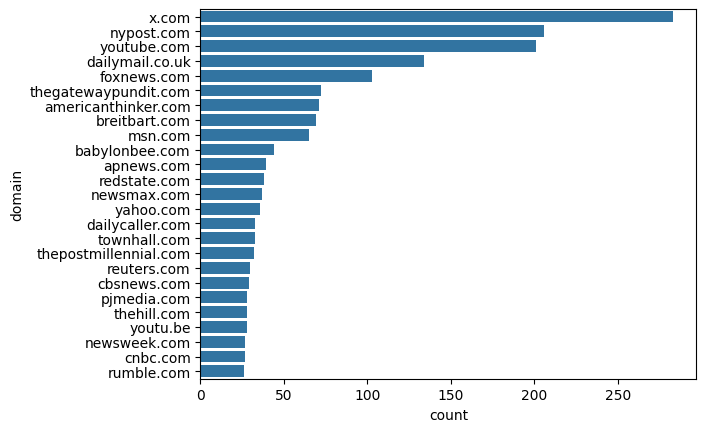

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<Axes: xlabel='count', ylabel='posted_by'>

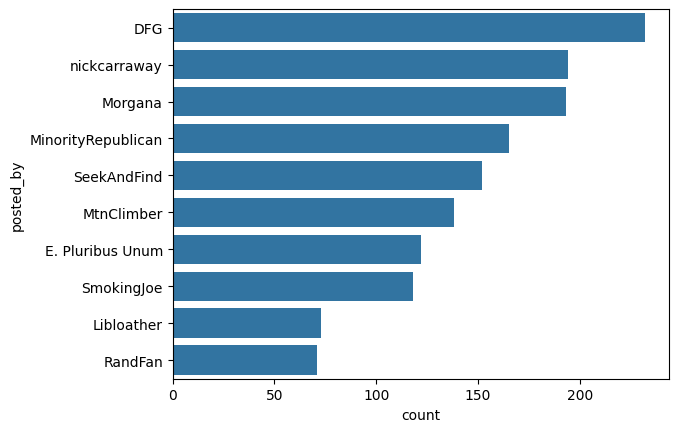

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

/tmp/ipykernel_139854/2178239382.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby(["domain", "posted_by"])


domain                                \
                                          count unique                    top   
domain                posted_by                                                 
americanthinker.com   MtnClimber             49      1    americanthinker.com   
                      SeekAndFind            15      1    americanthinker.com   
apnews.com            SeekAndFind             1      1             apnews.com   
                      DFG                     1      1             apnews.com   
                      E. Pluribus Unum        9      1             apnews.com   
                      MinorityRepublican      2      1             apnews.com   
                      RandFan                 1      1             apnews.com   
                      nickcarraway            1      1             apnews.com   
babylonbee.com        DFG                    10      1         babylonbee.com   
                      E. Pluribus Unum        2      1         babylonbee.com   
                      MinorityRepublican      1      1         babylonbee.com   
breitbart.com         MtnClimber              2      1          breitbart.com   
                      DFG                     7      1          breitbart.com   
                      MinorityRepublican      5      1          breitbart.com   
                      Morgana                13      1          breitbart.com   
                      SmokingJoe              5      1          breitbart.com   
cbsnews.com           SeekAndFind             1      1            cbsnews.com   
                      DFG                     4      1            cbsnews.com   
                      E. Pluribus Unum        1      1            cbsnews.com   
                      MinorityRepublican      1      1            cbsnews.com   
                      nickcarraway            2      1            cbsnews.com   
                      Morgana                 1      1            cbsnews.com   
                      Libloather              1      1            cbsnews.com   
cnbc.com              SeekAndFind             2      1               cnbc.com   
                      DFG                     4      1               cnbc.com   
                      RandFan                 1      1               cnbc.com   
dailycaller.com       MtnClimber              1      1        dailycaller.com   
                      DFG                    16      1        dailycaller.com   
dailymail.co.uk       MtnClimber              1      1        dailymail.co.uk   
                      SeekAndFind             1      1        dailymail.co.uk   
                      DFG                    23      1        dailymail.co.uk   
                      E. Pluribus Unum        1      1        dailymail.co.uk   
                      MinorityRepublican     20      1        dailymail.co.uk   
                      Morgana                33      1        dailymail.co.uk   
foxnews.com           MtnClimber              1      1            foxnews.com   
                      SeekAndFind             2      1            foxnews.com   
                      DFG                     3      1            foxnews.com   
                      E. Pluribus Unum        5      1            foxnews.com   
                      MinorityRepublican     11      1            foxnews.com   
                      nickcarraway            2      1            foxnews.com   
                      Morgana                 1      1            foxnews.com   
                      Libloather             21      1            foxnews.com   
msn.com               MtnClimber              1      1                msn.com   
                      SeekAndFind             1      1                msn.com   
                      E. Pluribus Unum        4      1                msn.com   
                      RandFan                 1      1                msn.com   
                      Libloather              1      1                ms

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

/tmp/ipykernel_139854/1921096508.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby('title').


,timestamp,replies
title,,
President Trump says Maduro and his wife have been captured. A news conference will be held at 11 A.M,2026-01-03 14:17:40,209.0
January 2026 Snow Storm,2026-01-23 05:26:16,192.0
United States is finalizing a staggering $700 billion cash offer to buy Greenland outright from Denmark,2026-01-20 23:32:23,186.0
"Poet Renee Nicole Good, 37, named as Minneapolis woman shot dead by ICE agent as video captures grieving wife at the scene",2026-01-08 01:36:21,182.0
"BREAKING: Chaos Erupts After ICE Fatally Shoots Minneapolis Rioter Who Attempted to Run Over Agents – Far-Left Mayor Jacob Frey Blames ICE, Demands Agents Leave City (VIDEO)",2026-01-07 19:54:03,170.0
"Favorite Country Western Songs,tell us your Favorites.Freeper Canteen 1~23~25",2026-01-23 04:44:37,164.0
LIVE UPDATES: ICE shooting in Minneapolis leaves woman dead,2026-01-07 19:54:03,157.0
